In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler,Binarizer
from sklearn.linear_model import LogisticRegression


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    
    roc_auc=roc_auc_score(y_test, pred_proba)
    result= {
        'confusion':confusion,
        "accuracy":accuracy,
        "precision":precision,
        "recall":recall,
        "f1":f1,
        'roc_auc':roc_auc
    }
    return result;

diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary= thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    start, end = plt.xlim();
    plt.xticks(np.round(np.arange(start,end, 0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend();
    plt.grid();
    plt.show();
    return;


In [23]:
X=diabetes_data.iloc[:, :-1]
y=diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =157, stratify=y)
lr_clf = LogisticRegression();
lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

res=get_clf_eval(y_test, pred, pred_proba)
res


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'confusion': array([[147,  18],
        [ 38,  51]]),
 'accuracy': 0.7795275590551181,
 'precision': 0.7391304347826086,
 'recall': 0.5730337078651685,
 'f1': 0.6455696202531644,
 'roc_auc': 0.8055158324821245}

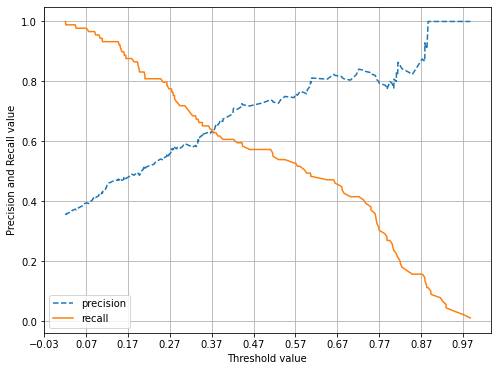

In [28]:
pred_proba_c1= lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

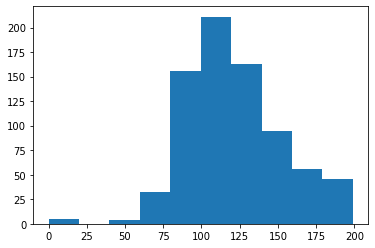

In [31]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [36]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

total_count = diabetes_data['Glucose'].count();

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count();
    print(f'{feature}: {zero_count}, {round((zero_count/total_count)*100, 2)}')



Glucose: 5, 0.65
BloodPressure: 35, 4.56
SkinThickness: 227, 29.56
Insulin: 374, 48.7
BMI: 11, 1.43


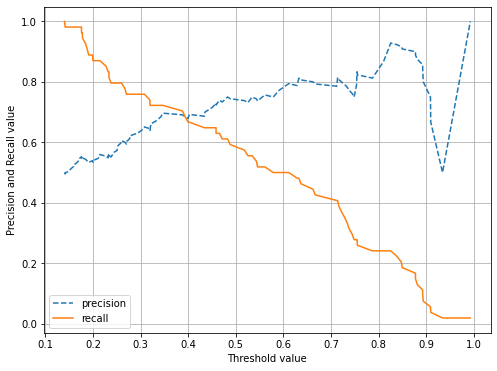

In [42]:
mean_zero_features = diabetes_data[zero_features].mean();

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count();
    none_zero_count=total_count-zero_count;
    none_zero_sum = diabetes_data[diabetes_data[feature]>0][feature].sum();
    mean_value= none_zero_sum/none_zero_count;
    diabetes_data[feature]=diabetes_data[feature].replace(0,mean_value)

    
    
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

scaler = StandardScaler();
X_scaled=scaler.fit_transform(X)

X_train,X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 159, stratify=y)

lr_clf = LogisticRegression();
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)


pred_proba_c1= lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)




In [54]:
binarizer = Binarizer(threshold=0.33)

pred_th = binarizer.fit_transform(pred_proba.reshape(-1,1))

get_clf_eval(y_test,pred_th, pred_proba )



{'confusion': array([[81, 19],
        [15, 39]]),
 'accuracy': 0.7792207792207793,
 'precision': 0.6724137931034483,
 'recall': 0.7222222222222222,
 'f1': 0.6964285714285714,
 'roc_auc': 0.8540740740740741}